In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
sb.set()
from sklearn.linear_model import LinearRegression

In [2]:
raw_data = pd.read_csv("1.04.+Real-life+example.csv")
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data_no_null = raw_data.dropna(axis=0)

In [5]:
data_no_null.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


<Axes: xlabel='Mileage', ylabel='Count'>

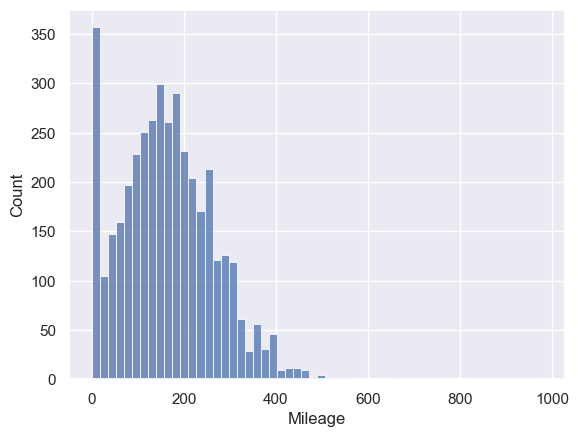

In [6]:
sb.histplot(data_no_null["Mileage"])

In [7]:
q = data_no_null["Mileage"].quantile(0.99)
data_1 = data_no_null[data_no_null["Mileage"]<q]

<Axes: xlabel='Mileage', ylabel='Count'>

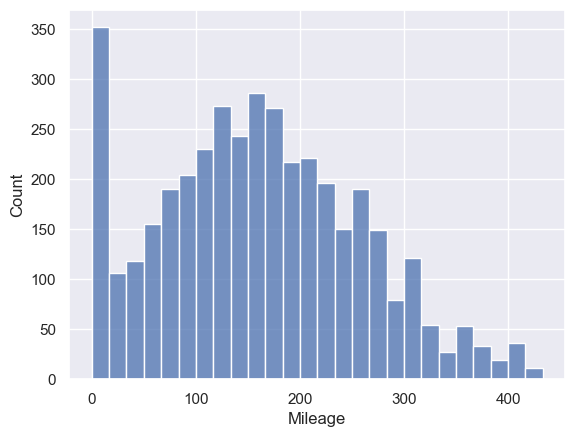

In [8]:
sb.histplot(data_1["Mileage"])

In [9]:
q = data_1["Price"].quantile(0.97)
data_2 = data_1[data_1["Price"]<q]

<Axes: xlabel='Price', ylabel='Count'>

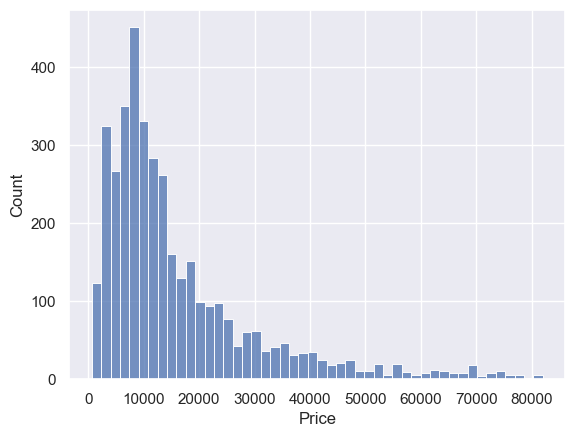

In [10]:
sb.histplot(data_2["Price"])

In [11]:
q = data_2["EngineV"].quantile(0.99)
data_3 = data_2[data_2["EngineV"]<6.5]

<Axes: xlabel='EngineV', ylabel='Count'>

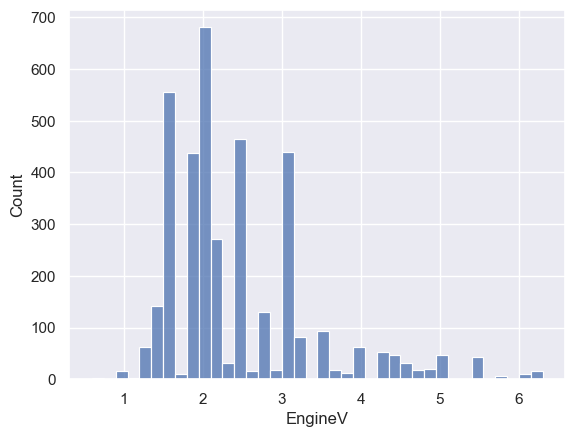

In [12]:
sb.histplot(data_3["EngineV"])

<Axes: xlabel='Year', ylabel='Count'>

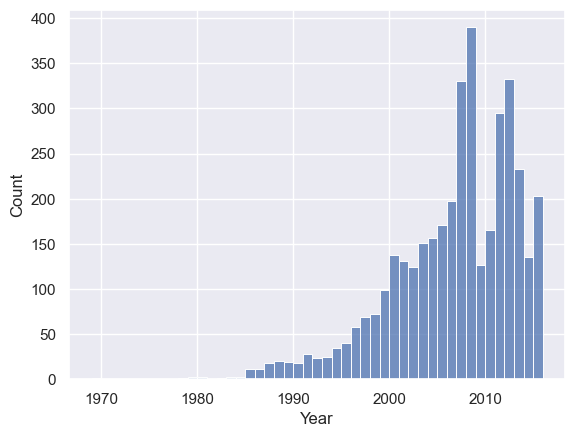

In [13]:
sb.histplot(data_3["Year"])

In [14]:
data_cleaned = data_3[data_3["Year"]>2000]

In [15]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3143,3143.000000,3143,3143.000000,3143.000000,3143,3143,3143.000000,3143
unique,7,NaN,6,NaN,NaN,4,2,NaN,248
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,Vito
freq,717,NaN,1074,NaN,NaN,1513,2945,NaN,132
mean,NaN,18756.141588,NaN,143.406936,2.442876,NaN,NaN,2008.615336,NaN
std,NaN,14906.109003,NaN,80.262123,0.978873,NaN,NaN,3.993866,NaN
min,NaN,1700.000000,NaN,0.000000,0.650000,NaN,NaN,2001.000000,NaN
25%,NaN,8900.000000,NaN,86.000000,1.800000,NaN,NaN,2006.000000,NaN
50%,NaN,13200.000000,NaN,143.000000,2.000000,NaN,NaN,2008.000000,NaN
75%,NaN,23500.000000,NaN,197.500000,3.000000,NaN,NaN,2012.000000,NaN


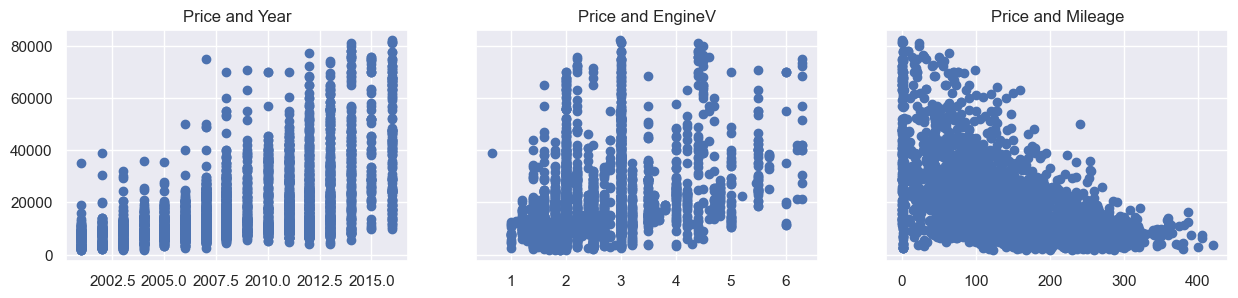

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

In [17]:
log_price = np.log(data_cleaned["Price"])
log_price
data_cleaned.loc[:,"Log price"] = log_price
data_cleaned

C:\Users\acer\AppData\Local\Temp\ipykernel_3100\987245910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.loc[:,"Log price"] = log_price


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Log price
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6,9.560997
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane,9.287209
...,...,...,...,...,...,...,...,...,...,...
4336,Renault,2100.0,vagon,237,1.9,Diesel,no,2001,Laguna,7.649693
4337,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane,8.824678
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556


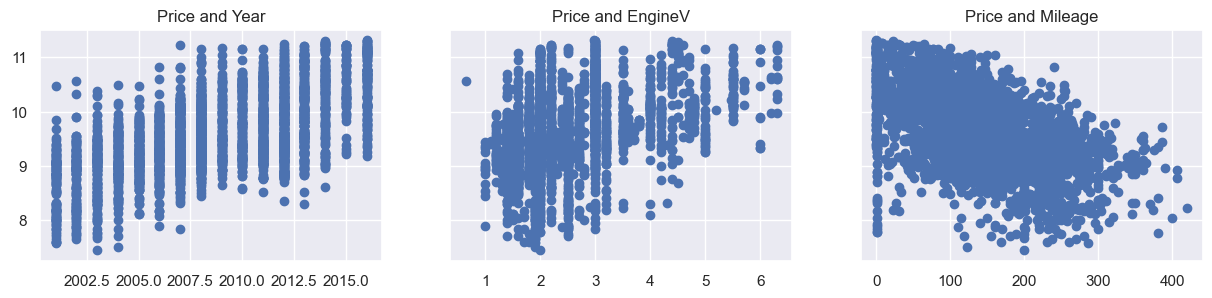

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Log price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Log price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Log price'])
ax3.set_title('Price and Mileage')

plt.show()

In [19]:
from sklearn.feature_selection import f_regression

In [20]:
x = data_cleaned[["Mileage", "EngineV", "Year"]]
y = data_cleaned["Log price"]
f_regression(x, y)

(array([1281.47472813,  791.49119106, 2021.66734064]),
 array([1.12139244e-235, 1.66117422e-155, 0.00000000e+000]))

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif["Features"] = ["Mileage", "EngineV", "Year"]
vif

,VIF,Features
0,4.184327,Mileage
1,7.240576,EngineV
2,9.936658,Year


In [23]:
data_cleaned = data_cleaned.drop("Year", axis=1)
data_cleaned 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model,Log price
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,Rav 4,9.814656
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,A6,9.560997
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,Megane,9.287209
...,...,...,...,...,...,...,...,...,...
4336,Renault,2100.0,vagon,237,1.9,Diesel,no,Laguna,7.649693
4337,Renault,6800.0,sedan,152,1.6,Petrol,yes,Megane,8.824678
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,T5 (Transporter),9.350102
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,Corolla,9.792556


In [24]:
data = data_cleaned.drop("Model", axis=1)
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Log price
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,9.560997
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,9.287209
...,...,...,...,...,...,...,...,...
4336,Renault,2100.0,vagon,237,1.9,Diesel,no,7.649693
4337,Renault,6800.0,sedan,152,1.6,Petrol,yes,8.824678
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,9.350102
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,9.792556


In [25]:
data_with_dummies = pd.get_dummies(data, drop_first=True, dtype=int)
data_with_dummies

,Price,Mileage,EngineV,Log price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
7,14200.0,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8,10799.0,193,1.5,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,2100.0,237,1.9,7.649693,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4337,6800.0,152,1.6,8.824678,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
4338,11500.0,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4339,17900.0,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1


In [26]:
variables = data_with_dummies.to_numpy(dtype=int)
vif = pd.DataFrame()

In [27]:
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = data_with_dummies.columns
pd.options.display.max_rows = 999
vif

,VIF,Features
0,-0.000394,Price
1,8.256627,Mileage
2,9.758486,EngineV
3,66.922812,Log price
4,2.537622,Brand_BMW
5,3.049356,Brand_Mercedes-Benz
6,2.155912,Brand_Mitsubishi
7,2.817066,Brand_Renault
8,2.820440,Brand_Toyota
9,3.770526,Brand_Volkswagen


In [28]:
data = data_with_dummies.drop(["Registration_yes"], axis=1)
data

,Price,Mileage,EngineV,Log price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7,14200.0,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,10799.0,193,1.5,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,2100.0,237,1.9,7.649693,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4337,6800.0,152,1.6,8.824678,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4338,11500.0,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4339,17900.0,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [29]:
variables = data.to_numpy(dtype=float)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(variables.shape[1])]
vif["Features"] = data.columns
vif

,VIF,Features
0,9.461451,Price
1,8.612596,Mileage
2,13.789716,EngineV
3,53.022187,Log price
4,2.546424,Brand_BMW
5,3.085194,Brand_Mercedes-Benz
6,2.180208,Brand_Mitsubishi
7,2.808904,Brand_Renault
8,2.831085,Brand_Toyota
9,3.793947,Brand_Volkswagen


## Regression

In [30]:
targets = data_with_dummies["Log price"]
inputs = data_with_dummies.drop(["Price", "Log price"], axis=1)

In [31]:
from sklearn.preprocessing import StandardScaler, scale

In [32]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [33]:
data_scaled = scaler.transform(inputs)

data1 = scale(inputs)
data1

array([[ 2.6740784 ,  2.61273057, -0.40452824, ..., -0.16367233,
        -0.74613085,  0.25929249],
       [ 1.20366158,  1.7953339 , -0.40452824, ..., -0.16367233,
         1.34024749,  0.25929249],
       [-0.29167756, -0.45250695, -0.40452824, ..., -0.16367233,
         1.34024749,  0.25929249],
       ...,
       [ 0.2441523 ,  0.05836597, -0.40452824, ..., -0.16367233,
        -0.74613085,  0.25929249],
       [-1.35087612, -0.86120528, -0.40452824, ..., -0.16367233,
         1.34024749,  0.25929249],
       [-0.24183293, -0.45250695, -0.40452824, ..., -0.16367233,
        -0.74613085,  0.25929249]])

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_scaled, targets, test_size=0.2, random_state=365)

In [35]:
x_train

array([[-0.10476017, -0.96337987, -0.40452824, ..., -0.16367233,
        -0.74613085,  0.25929249],
       [ 0.77998215, -0.45250695, -0.40452824, ..., -0.16367233,
        -0.74613085,  0.25929249],
       [ 0.91705491, -0.55468153, -0.40452824, ..., -0.16367233,
        -0.74613085,  0.25929249],
       ...,
       [-1.10165293,  3.94100016, -0.40452824, ..., -0.16367233,
         1.34024749,  0.25929249],
       [-0.30413872,  3.94100016, -0.40452824, ..., -0.16367233,
         1.34024749,  0.25929249],
       [ 2.69900072,  0.05836597, -0.40452824, ..., -0.16367233,
        -0.74613085,  0.25929249]])

In [36]:
x_test

array([[ 1.42796245, -0.7590307 , -0.40452824, ..., -0.16367233,
        -0.74613085, -3.85664846],
       [ 0.45599201, -0.45250695, -0.40452824, ..., -0.16367233,
         1.34024749,  0.25929249],
       [-0.24183293,  0.56923889, -0.40452824, ..., -0.16367233,
        -0.74613085,  0.25929249],
       ...,
       [-0.69043467, -0.86120528, -0.40452824, ..., -0.16367233,
         1.34024749,  0.25929249],
       [ 0.20676882,  0.05836597,  2.47201532, ..., -0.16367233,
         1.34024749,  0.25929249],
       [-1.77455555, -0.96337987, -0.40452824, ..., -0.16367233,
        -0.74613085,  0.25929249]])

In [37]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [38]:
reg.score(x_train, y_train)

0.7569811705586832

In [39]:
y_hat = reg.predict(x_train)

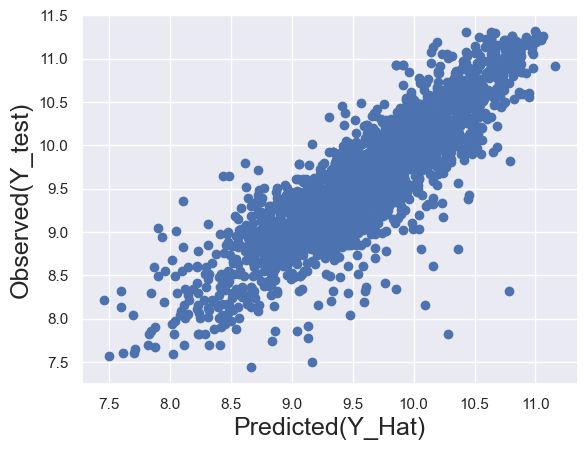

In [40]:
plt.scatter(y_hat, y_train)
plt.xlabel("Predicted(Y_Hat)", size=18)
plt.ylabel("Observed(Y_test)", size=18)
plt.show()

<Axes: xlabel='Log price', ylabel='Count'>

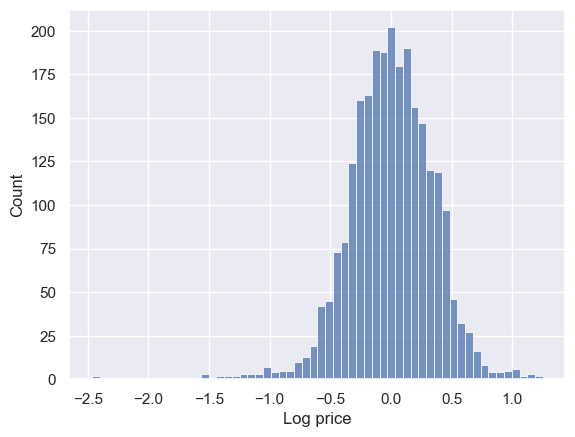

In [41]:
sb.histplot(y_train - y_hat)

In [42]:
reg.coef_

array([-0.34210582,  0.19032663,  0.02327427, -0.01929476, -0.17173042,
       -0.22660511, -0.08675739, -0.10675343, -0.12581995, -0.08113794,
       -0.14948659, -0.10219754, -0.16188097, -0.08643245, -0.02103819,
       -0.12523107,  0.25330545])

In [43]:
summary = pd.DataFrame()
summary["Weights"] = reg.coef_
summary["Features"] = inputs.columns
summary

,Weights,Features
0,-0.342106,Mileage
1,0.190327,EngineV
2,0.023274,Brand_BMW
3,-0.019295,Brand_Mercedes-Benz
4,-0.171730,Brand_Mitsubishi
5,-0.226605,Brand_Renault
6,-0.086757,Brand_Toyota
7,-0.106753,Brand_Volkswagen
8,-0.125820,Body_hatch
9,-0.081138,Body_other


## Summary

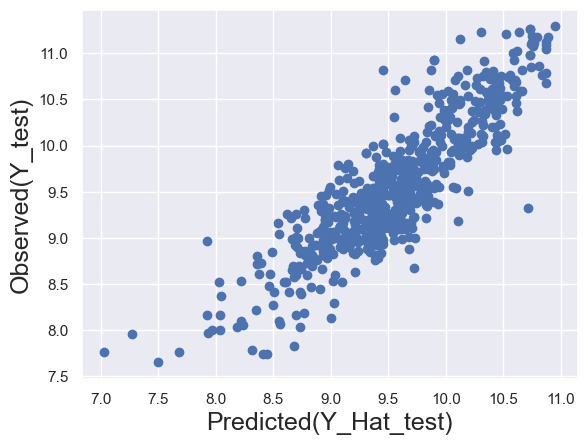

In [44]:
y_hat_test = reg.predict(x_test)

plt.scatter(y_hat_test, y_test)
plt.xlabel("Predicted(Y_Hat_test)", size=18)
plt.ylabel("Observed(Y_test)", size=18)
plt.show()

In [45]:
y_test = y_test.reset_index(drop=True)

df_pf = pd.DataFrame()
df_pf["Predict price"] = np.exp(y_hat_test)
df_pf["Targets"] = np.exp(y_test)
df_pf

,Predict price,Targets
0,3104.634043,3500.00
1,10521.697663,8900.00
2,25832.738940,22500.00
3,18463.377987,11900.00
4,26740.473464,37800.00
5,16437.338303,16030.00
6,12333.960285,15000.00
7,53740.243339,71500.00
8,9148.432935,10300.00
9,17430.284051,20500.00


In [46]:
df_pf["Differences"] = df_pf["Predict price"] - df_pf["Targets"]
df_pf["% Differences"] = np.abs(df_pf["Differences"]/df_pf["Targets"]*100)
df_pf

,Predict price,Targets,Differences,% Differences
0,3104.634043,3500.00,-395.365957,11.296170
1,10521.697663,8900.00,1621.697663,18.221322
2,25832.738940,22500.00,3332.738940,14.812173
3,18463.377987,11900.00,6563.377987,55.154437
4,26740.473464,37800.00,-11059.526536,29.258007
5,16437.338303,16030.00,407.338303,2.541100
6,12333.960285,15000.00,-2666.039715,17.773598
7,53740.243339,71500.00,-17759.756661,24.838821
8,9148.432935,10300.00,-1151.567065,11.180263
9,17430.284051,20500.00,-3069.715949,14.974224


In [47]:
df_pf.describe()

,Predict price,Targets,Differences,% Differences
count,629.000000,629.000000,629.000000,629.000000
mean,17025.840640,18379.664054,-1353.823414,27.204017
std,10615.401295,14697.101583,7764.022618,25.702428
min,1127.374273,2100.000000,-45458.344059,0.128457
25%,9873.554125,8950.000000,-3069.715949,10.029416
50%,14036.485294,12900.000000,82.086395,21.870948
75%,21289.644571,22900.000000,2839.735189,36.848793
max,56957.275482,80000.000000,33898.849801,302.668302
